# Dirichlet Process Mixture Model for the CMUMAD Dataset

This script aims to perform action segmentation using DPMM trained with memoroized variational inference method. The DPMM method provides a nice way to derive model parameters and model complexity jointly. We test with the following features: **IDT+FV**, **VGG16**, **jointLocs**, **relativeAngle** and **quaternions**. 

__1. import necessary libraries__

In [46]:
import bnpy
import numpy as np
import os
import time

from matplotlib import pyplot as plt
import seaborn as sns

__2. define function to visualize segmentation result__

In [47]:
def plot_segmentation(labels):
    plt.plot(labels)
    plt.show()
    

__3. run the core part__

3.1 One should note that we need read out the feature vectors from prepared files.

3.2 The bnpy package support reading data from *.mat files.

-- processing: CMUMAD_VGG16_sub01_seq01
--- read data
--- train DPMM
--- output results


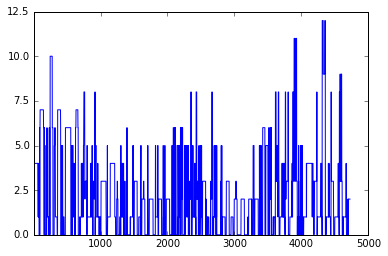

-- processing: CMUMAD_VGG16_sub01_seq02
--- read data
--- train DPMM
--- output results


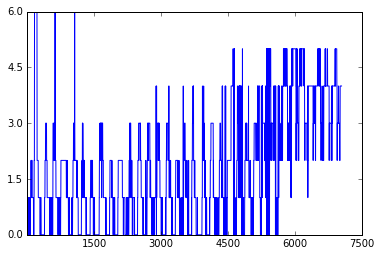

-- processing: CMUMAD_VGG16_sub02_seq01
--- read data
--- train DPMM
--- output results


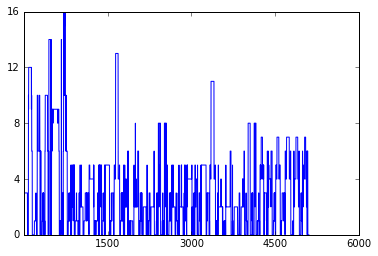

-- processing: CMUMAD_VGG16_sub02_seq02
--- read data
--- train DPMM
--- output results


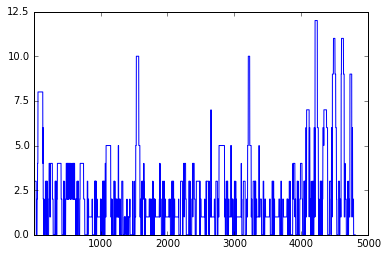

-- processing: CMUMAD_VGG16_sub03_seq01
--- read data
--- train DPMM
--- output results


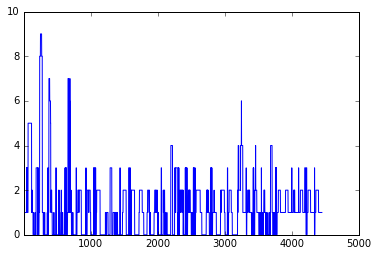

-- processing: CMUMAD_VGG16_sub03_seq02
--- read data
--- train DPMM
--- output results


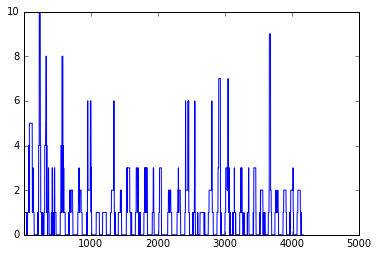

-- processing: CMUMAD_VGG16_sub04_seq01
--- read data
--- train DPMM
--- output results


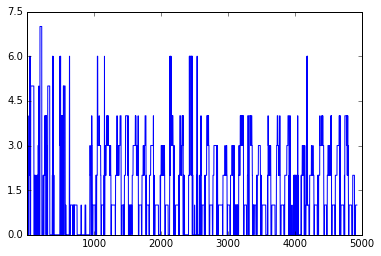

-- processing: CMUMAD_VGG16_sub04_seq02
--- read data
--- train DPMM
--- output results


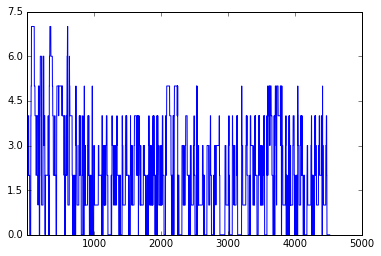

-- processing: CMUMAD_VGG16_sub05_seq01
--- read data
--- train DPMM
--- output results


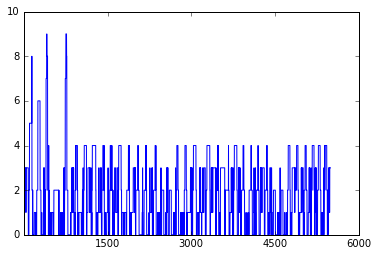

-- processing: CMUMAD_VGG16_sub05_seq02
--- read data
--- train DPMM
--- output results


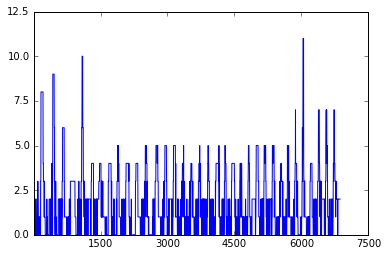

-- processing: CMUMAD_VGG16_sub06_seq01
--- read data
--- train DPMM
--- output results


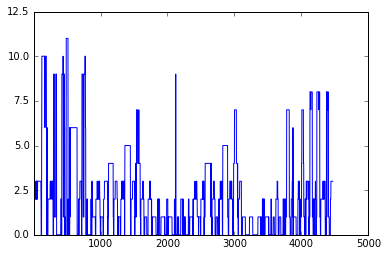

-- processing: CMUMAD_VGG16_sub06_seq02
--- read data
--- train DPMM
--- output results


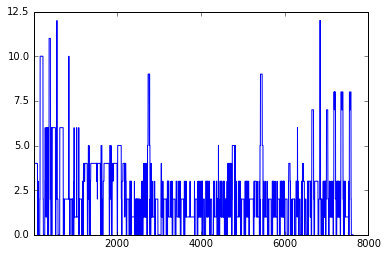

-- processing: CMUMAD_VGG16_sub07_seq01
--- read data
--- train DPMM
--- output results


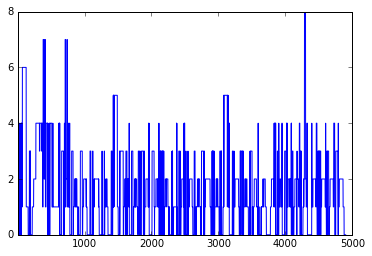

-- processing: CMUMAD_VGG16_sub07_seq02
--- read data
--- train DPMM
--- output results


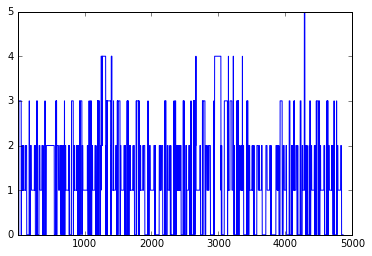

-- processing: CMUMAD_VGG16_sub08_seq01
--- read data
--- train DPMM
--- output results


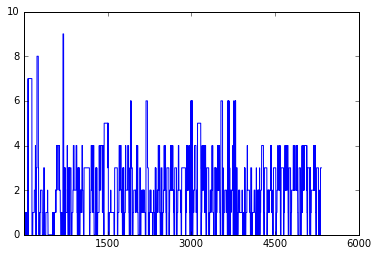

-- processing: CMUMAD_VGG16_sub08_seq02
--- read data
--- train DPMM
--- output results


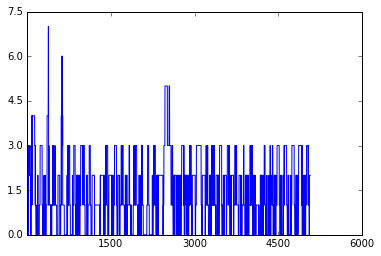

-- processing: CMUMAD_VGG16_sub09_seq01
--- read data
--- train DPMM
--- output results


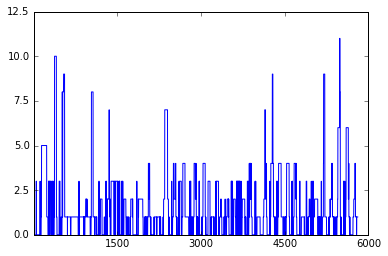

-- processing: CMUMAD_VGG16_sub09_seq02
--- read data
--- train DPMM
--- output results


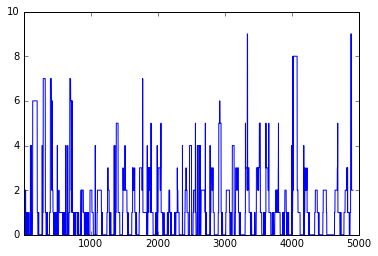

-- processing: CMUMAD_VGG16_sub10_seq01
--- read data
--- train DPMM
--- output results


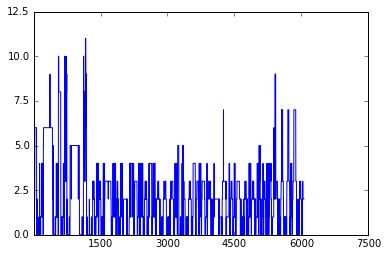

-- processing: CMUMAD_VGG16_sub10_seq02
--- read data
--- train DPMM
--- output results


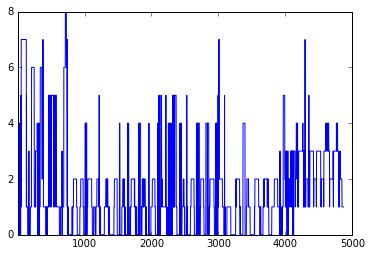

-- processing: CMUMAD_VGG16_sub11_seq01
--- read data
--- train DPMM
--- output results


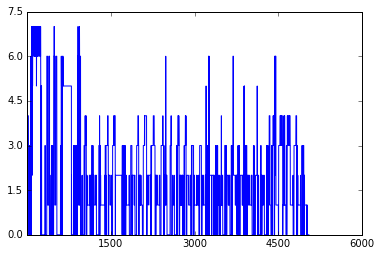

-- processing: CMUMAD_VGG16_sub11_seq02
--- read data
--- train DPMM
--- output results


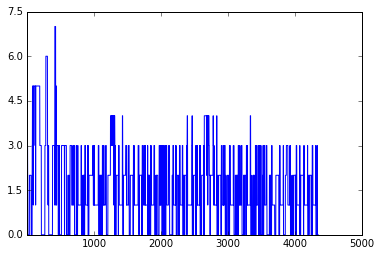

-- processing: CMUMAD_VGG16_sub12_seq01
--- read data
--- train DPMM
--- output results


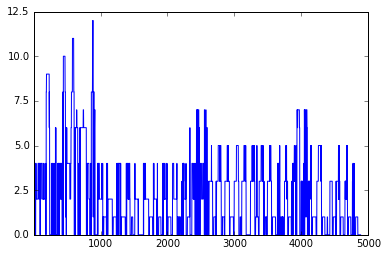

-- processing: CMUMAD_VGG16_sub12_seq02
--- read data
--- train DPMM
--- output results


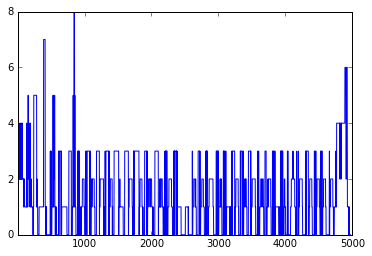

-- processing: CMUMAD_VGG16_sub13_seq01
--- read data
--- train DPMM
--- output results


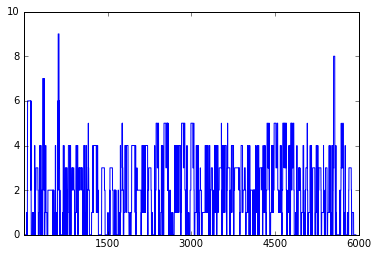

-- processing: CMUMAD_VGG16_sub13_seq02
--- read data
--- train DPMM
--- output results


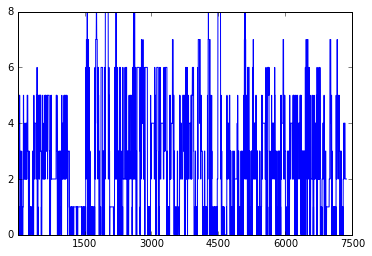

-- processing: CMUMAD_VGG16_sub14_seq01
--- read data
--- train DPMM
--- output results


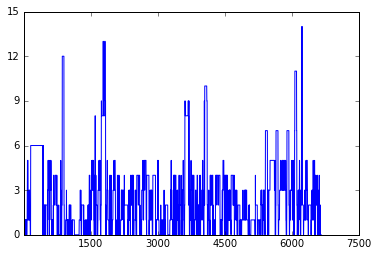

-- processing: CMUMAD_VGG16_sub14_seq02
--- read data
--- train DPMM
--- output results


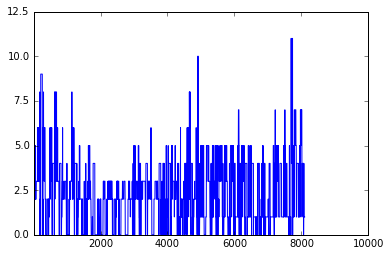

-- processing: CMUMAD_VGG16_sub15_seq01
--- read data
--- train DPMM
--- output results


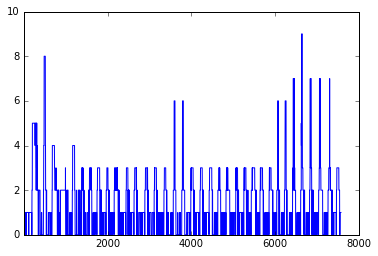

-- processing: CMUMAD_VGG16_sub15_seq02
--- read data
--- train DPMM
--- output results


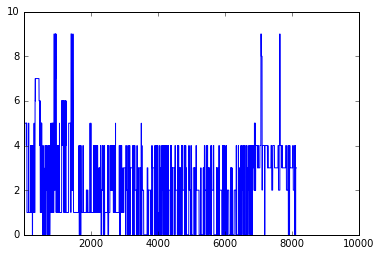

-- processing: CMUMAD_VGG16_sub16_seq01
--- read data
--- train DPMM
--- output results


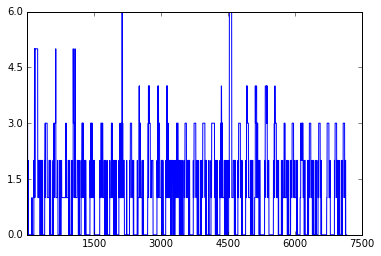

-- processing: CMUMAD_VGG16_sub16_seq02
--- read data
--- train DPMM
--- output results


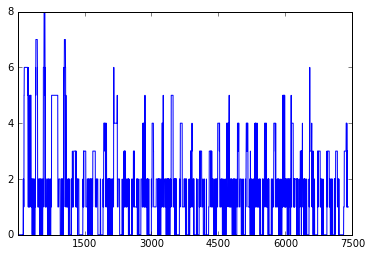

-- processing: CMUMAD_VGG16_sub17_seq01
--- read data
--- train DPMM
--- output results


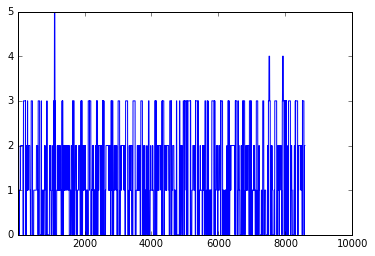

-- processing: CMUMAD_VGG16_sub17_seq02
--- read data
--- train DPMM
--- output results


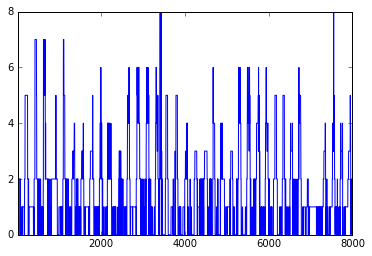

-- processing: CMUMAD_VGG16_sub18_seq01
--- read data
--- train DPMM
--- output results


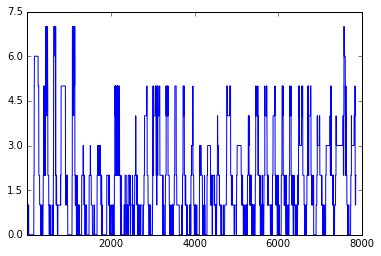

-- processing: CMUMAD_VGG16_sub18_seq02
--- read data
--- train DPMM
--- output results


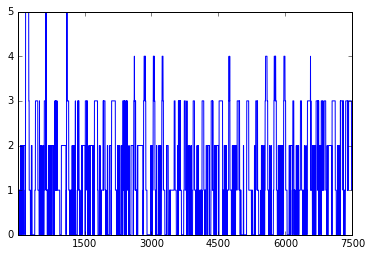

-- processing: CMUMAD_VGG16_sub19_seq01
--- read data
--- train DPMM
--- output results


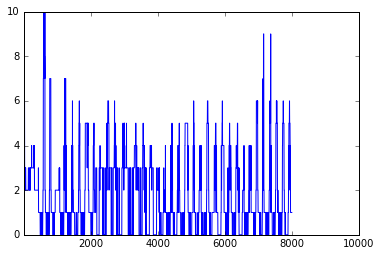

-- processing: CMUMAD_VGG16_sub19_seq02
--- read data
--- train DPMM
--- output results


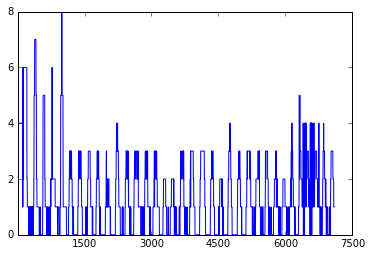

-- processing: CMUMAD_VGG16_sub20_seq01
--- read data
--- train DPMM
--- output results


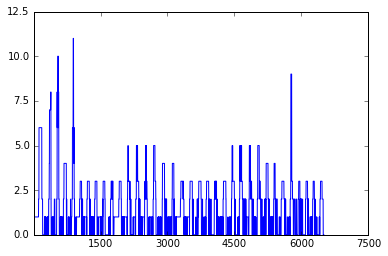

-- processing: CMUMAD_VGG16_sub20_seq02
--- read data
--- train DPMM
--- output results


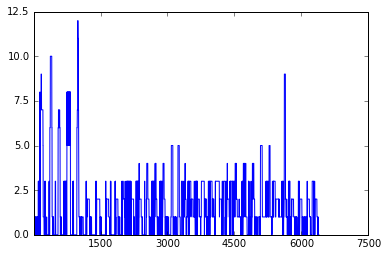

VGG16:mean(runtime)=8.55395894051


In [51]:
feature_list = ['idtfv', 'VGG16', 'jointLocs','relativeAngle','quaternions']
dataset_path = '/home/yzhang/Videos/Dataset_CMUMAD/features'
result_path = '/home/yzhang/Videos/Dataset_CMUMAD/DPMM_segmentation_results'
cpt_time = []

for feature_type in feature_list[1:2]:
    for sub in range(20):
        for seq in range(2):
            print '-- processing: CMUMAD_{:s}_sub{:02d}_seq{:02d}'.format(feature_type,sub+1, seq+1)

            ## read the features from the file
            filename = 'CMUMAD_{:s}_sub{:02d}_seq{:02d}.mat'.format(feature_type,sub+1, seq+1)
            print '--- read data'
            dataset = bnpy.data.XData.read_mat(os.path.join(dataset_path, filename))

            ## train DPMM using online algorithm
            print '--- train DPMM'
            time_start = time.time()
            K1_trained_model, K1_info_dict = bnpy.run(
            dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
            output_path='/tmp/CUMMAD_DPMM/trymoves-K=1/',
            doWriteStdOut=False,
            nLap=30, nTask=1, nBatch=10,
            sF=0.5, ECovMat='eye',
            K=1, initname='randexamples',
            moves='birth,merge,shuffle',
            m_startLap=5, b_startLap=2, b_Kfresh=4)

            ## measure running time
            eps = time.time()-time_start
            cpt_time = np.append(cpt_time, eps)

            ## assign labels to samples (0-based cluster)
            print '--- output results'
            Q = K1_trained_model.calc_local_params(dataset)['E_log_soft_ev'] # time X dimension, matrix of encoded features
            sample_labels = np.argmax(Q, axis=1)
            plot_segmentation(sample_labels)

            ## save the sample labels to file
            outfile = 'CMUMAD_{:s}_sub{:02d}_seq{:02d}_DPMM_SampleLabels.txt'.format(feature_type,sub+1, seq+1)
            np.savetxt(os.path.join(result_path, outfile), sample_labels)

            ## save the encoded features to file
            outfile2 = 'CMUMAD_{:s}_sub{:02d}_seq{:02d}_DPMM_SampleEncoding.txt'.format(feature_type,sub+1, seq+1)
            np.savetxt(os.path.join(result_path, outfile2), Q)
            
    print feature_type+':mean(runtime)=' + str(np.mean(cpt_time))

mean(runtime)=34.5368275881


['jointLocs', 'relativeAngle', 'quaternions']